In [1]:
import pandas as pd

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets

Data is found in 102flowers.tgz file. 

<font size = '+2'> I. Unpack tar file

In [3]:
import tarfile
mytar = tarfile.open('C:\\Users\\cgwel\\2526\\102flowers.tgz')
mytar.extractall('C:\\Users\\cgwel\\2526')
mytar.close()

 102flowers.tgz contains jpg files of flowers
<br> 102segmentations.tgz contains segments jpg files of flowers

<font size = '+2'> Handle .mat files </font> <br> .mat files contain the labels and other fun stuff that we can use for training a comprehensive model later

In [4]:
import os
import scipy.io as sio

label_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\imagelabels.mat')
distance_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\distancematrices102.mat')
setid_mat_file = sio.loadmat(r'C:\Users\cgwel\2526\setid.mat')

Check what the label mat file contains

In [5]:
label_mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels'])

In [6]:
type(label_mat_file['labels']),label_mat_file['labels'].shape

(numpy.ndarray, (1, 8189))

In [7]:
type(label_mat_file['labels'][0][0]),label_mat_file['labels'][0][0].shape

(numpy.uint8, ())

In [8]:
setid_mat_file.keys()

print(setid_mat_file)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009', '__version__': '1.0', '__globals__': [], 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16), 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16), 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}


numpy does not know the shape of the uint8 array

In [9]:
#access the members of the structs using keys

print(label_mat_file)

#parse .mat file structure
label_list = [[element  for element in upperElement] for upperElement in label_mat_file['labels'] ]
#send to a pandas dataframe
new_data = list(label_list[0])
columns = ['label']

label_df = pd.DataFrame(new_data, columns = columns)
label_df.to_csv('labels.csv',index = False)
#print(label_list)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009', '__version__': '1.0', '__globals__': [], 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}


All of the label names are numbers. We can cross refrence the numbers to class names and create a dataframe to label the images later. For now we will stick with the number as the class name. 

In [10]:
label_list[0][250]

77

In [11]:
unique_vals = label_df['label'].value_counts()
unique_vals.shape

(102,)

After getting each unique value and their counts from label_df we can see we have 102 classes of flowers

Lets see how many files are in the jpg folder

In [12]:


folder_path = r'C:\Users\cgwel\2526\jpg'

file_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

print(f"The folder '{folder_path}' contains {file_count} files.")


The folder 'C:\Users\cgwel\2526\jpg' contains 8189 files.


In [13]:
label_df.shape

(8189, 1)

Total of 8189 label names for each file hence we should have a total of 8189 .jpg files. 

In [14]:
label_df

,label
0,77
1,77
2,77
3,77
4,77
...,...
8184,62
8185,62
8186,62
8187,62


The number of labels match the number of files in jpg (8189 == 8189). Assuming the jpg files are in order we are going to add the label to the end of the jpg file name and bin all the same labels into seperate folders


<font size = '+2'> Label images

Iterate over the image folder and label the images given the label dataframe. <br> Count the number of images per class and double check each class has the right amount of images after 80-20 split

In [15]:
import os
import pandas as pd

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Load the label DataFrame
# Replace "path/to/label_df.csv" with the actual path to your label DataFrame
label_df = pd.read_csv(r"C:\Users\cgwel\2526\labels.csv")

# Check if labeling has already been done by examining the file names
already_labeled = all(filename.split("_")[0].isdigit() for filename in os.listdir(image_folder))

if already_labeled:
    print('Labeling has already been done. Skipping the process.')
else:
    # Iterate over the image files in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            image_index = int(filename.split("_")[1].split(".")[0])

            # Get the label for the current image index from the DataFrame
            label = label_df.loc[image_index - 1, "label"]

            # Rename the image file with the label
            new_filename = f"{label}_{filename}"
            new_image_path = os.path.join(image_folder, new_filename)

            # Rename the image file
            os.rename(image_path, new_image_path)

            # Optional: Update the DataFrame with the new filename if needed
            label_df.loc[image_index - 1, "Filename"] = new_filename

    # Optional: Save the updated DataFrame to a new file if needed
    label_df.to_csv("updated_label_df.csv", index=False)

    print('Labeling completed successfully.')


Labeling completed successfully.


Count images amount per class

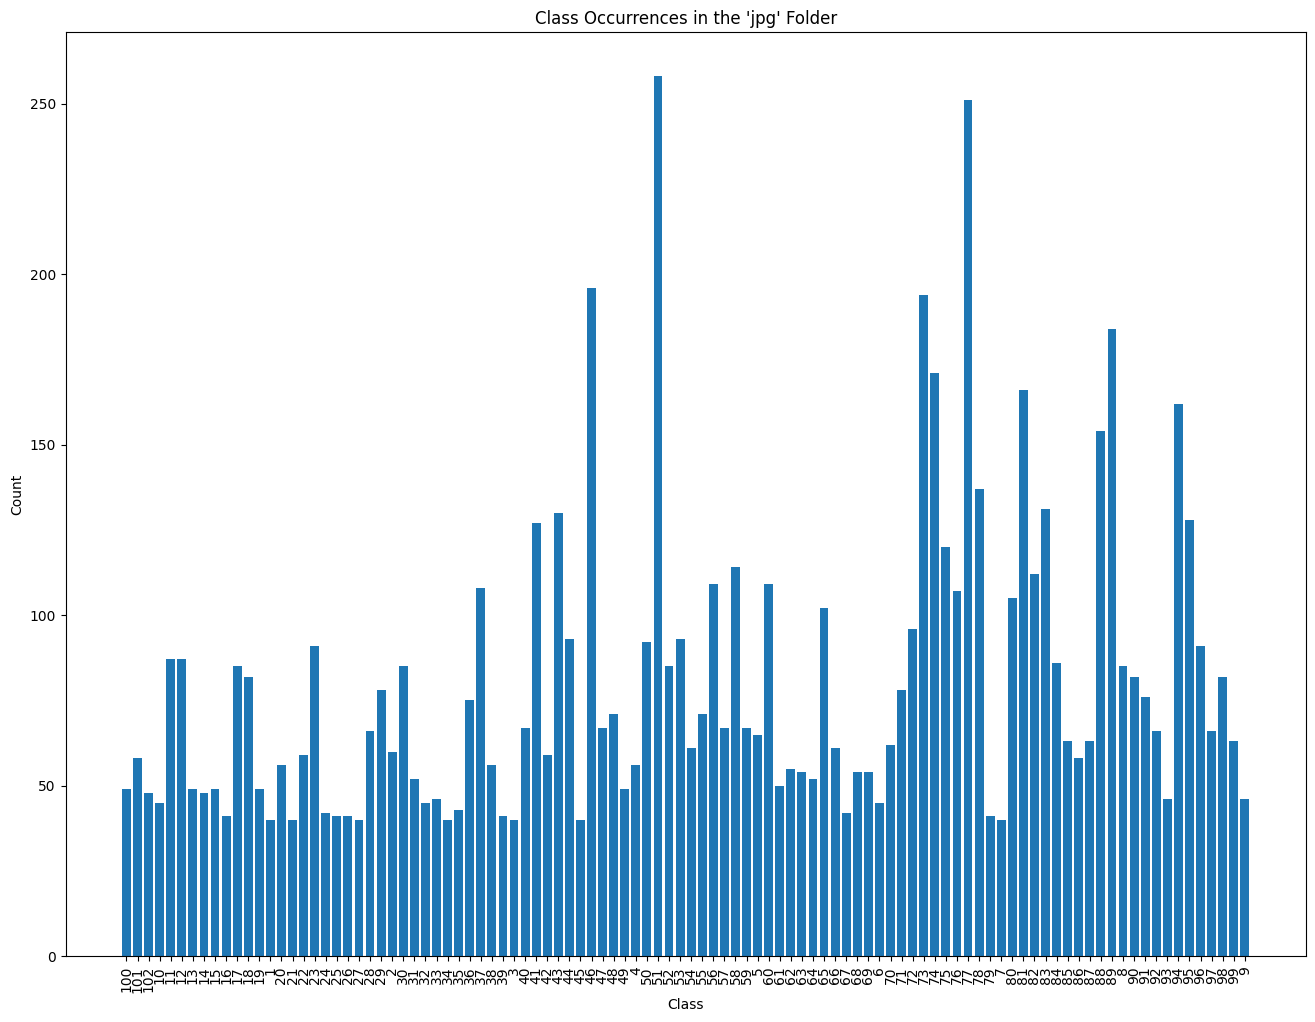

<Figure size 2000x1200 with 0 Axes>

Class '100' occurs 49 times.
Class '101' occurs 58 times.
Class '102' occurs 48 times.
Class '10' occurs 45 times.
Class '11' occurs 87 times.
Class '12' occurs 87 times.
Class '13' occurs 49 times.
Class '14' occurs 48 times.
Class '15' occurs 49 times.
Class '16' occurs 41 times.
Class '17' occurs 85 times.
Class '18' occurs 82 times.
Class '19' occurs 49 times.
Class '1' occurs 40 times.
Class '20' occurs 56 times.
Class '21' occurs 40 times.
Class '22' occurs 59 times.
Class '23' occurs 91 times.
Class '24' occurs 42 times.
Class '25' occurs 41 times.
Class '26' occurs 41 times.
Class '27' occurs 40 times.
Class '28' occurs 66 times.
Class '29' occurs 78 times.
Class '2' occurs 60 times.
Class '30' occurs 85 times.
Class '31' occurs 52 times.
Class '32' occurs 45 times.
Class '33' occurs 46 times.
Class '34' occurs 40 times.
Class '35' occurs 43 times.
Class '36' occurs 75 times.
Class '37' occurs 108 times.
Class '38' occurs 56 times.
Class '39' occurs 41 times.
Class '3' occurs 4

In [16]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Initialize a counter to keep track of the class occurrences
class_counter = Counter()

# Iterate over the image files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        label = filename.split("_")[0]
        class_counter[label] += 1

# Get the class labels and their corresponding counts
labels = list(class_counter.keys())
counts = list(class_counter.values())

# Plot the class occurrences
plt.figure(figsize = (16,12))
plt.bar(labels, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Occurrences in the 'jpg' Folder")
plt.xticks(rotation=90)
plt.figure(figsize = (20,12))
plt.show()

for label, count in class_counter.items():
    print(f"Class '{label}' occurs {count} times.")


<font size = '+2'> Create train and validation folders 80 20 split

In [17]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the folder containing the images
image_folder = r'C:\Users\cgwel\2526\jpg'

# Destination folder for train and val sets
destination_folder = r'C:\Users\cgwel\2526\flowers'

# Check if the destination folder already exists
if not os.path.exists(destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get the list of image files in the image folder
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

    # Split the image files into train and val sets
    train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # Function to extract class label from image file name
    def get_class_label(file_name):
        class_label = int(file_name.split('_')[0])
        return class_label

    # Move the train files to the train folder
    for train_file in train_files:
        train_src = os.path.join(image_folder, train_file)
        train_class = get_class_label(train_file)
        train_folder = os.path.join(destination_folder, 'train', str(train_class))
        os.makedirs(train_folder, exist_ok=True)
        train_dst = os.path.join(train_folder, train_file)
        shutil.move(train_src, train_dst)

    # Move the val files to the val folder
    for val_file in val_files:
        val_src = os.path.join(image_folder, val_file)
        val_class = get_class_label(val_file)
        val_folder = os.path.join(destination_folder, 'val', str(val_class))
        os.makedirs(val_folder, exist_ok=True)
        val_dst = os.path.join(val_folder, val_file)
        shutil.move(val_src, val_dst)

    print('Files moved successfully.')
else:
    print('Destination folder already exists. Skipping the process.')


Destination folder already exists. Skipping the process.


Create a test folder for testing later. Images used are unseen photos from the 17flowers dataset

In [18]:
import os
import shutil

# Source folder containing the images
source_folder = r'C:\Users\cgwel\2526\flowers\val'

# Destination folder to save the copied images
destination_folder = r'C:\Users\cgwel\2526\test'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Check if the destination folder already exists
if not os.path.exists(destination_folder):
    # Copy each subfolder and its contents to the destination folder
    for folder_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, folder_name)
        destination_path = os.path.join(destination_folder, folder_name)
        shutil.copytree(source_path, destination_path)

    print('Folders and their contents copied successfully to the "test" folder.')
else:
    print('Destination folder already exists. Skipping the copying process.')


Destination folder already exists. Skipping the copying process.


In [19]:
import os

# Path to the parent folder containing the train and val folders
parent_folder = r'C:\Users\cgwel\2526\classes'

# Iterate over the class folders
for class_folder in os.listdir(parent_folder):
    class_folder_path = os.path.join(parent_folder, class_folder)
    if os.path.isdir(class_folder_path):
        train_folder_path = os.path.join(class_folder_path, 'train')
        val_folder_path = os.path.join(class_folder_path, 'val')

        # Count the number of images in the train folder
        train_count = len(os.listdir(train_folder_path))

        # Count the number of images in the val folder
        val_count = len(os.listdir(val_folder_path))

        # Print the class label and the counts
        print(f"Class: {class_folder}")
        print(f"Train Count: {train_count}")
        print(f"Val Count: {val_count}")
        print("---------------")


Class: 1
Train Count: 33
Val Count: 7
---------------
Class: 10
Train Count: 32
Val Count: 13
---------------
Class: 100
Train Count: 40
Val Count: 9
---------------
Class: 101
Train Count: 37
Val Count: 21
---------------
Class: 102
Train Count: 44
Val Count: 4
---------------
Class: 11
Train Count: 73
Val Count: 14
---------------
Class: 12
Train Count: 70
Val Count: 17
---------------
Class: 13
Train Count: 42
Val Count: 7
---------------
Class: 14
Train Count: 36
Val Count: 12
---------------
Class: 15
Train Count: 35
Val Count: 14
---------------
Class: 16
Train Count: 27
Val Count: 14
---------------
Class: 17
Train Count: 70
Val Count: 15
---------------
Class: 18
Train Count: 67
Val Count: 15
---------------
Class: 19
Train Count: 33
Val Count: 16
---------------
Class: 2
Train Count: 41
Val Count: 19
---------------
Class: 20
Train Count: 46
Val Count: 10
---------------
Class: 21
Train Count: 35
Val Count: 5
---------------
Class: 22
Train Count: 51
Val Count: 8
-------------

Using these values we can double check that each class has the right amount of images

Let check if the amount of folders in classes is equal to the amount of classes found previously as unique_vals

In [20]:


folder_path = r'C:\Users\cgwel\2526\classes'  # Specify the path to the folder

# Get the list of items (files and folders) within the folder
items = os.listdir(folder_path)

# Count the number of folders
num_folders = sum(os.path.isdir(os.path.join(folder_path, item)) for item in items)

print(f"The folder '{folder_path}' contains {num_folders} folders.")


The folder 'C:\Users\cgwel\2526\classes' contains 102 folders.


102 folders == 102 uniqe values seems like the classes are sperated correctly

In [21]:
import os

# Path to the folder
data_folder = r'C:\Users\cgwel\2526\classes'

# Initialize a set to store the unique file formats
file_formats = set()

# Recursive function to traverse the folder and its subfolders
def traverse_folder(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            _, extension = os.path.splitext(file)
            file_formats.add(extension[1:])  # Exclude the dot from the extension

# Traverse the folder and its subfolders
traverse_folder(data_folder)

# Print the file formats
print("File Formats:")
for format in file_formats:
    print(format)


File Formats:
jpg


All of the images are of jpg format

Anomalies:
Image 151 - Height: 807, Width: 500
Image 156 - Height: 781, Width: 500
Image 221 - Height: 812, Width: 500
Image 228 - Height: 833, Width: 500
Image 256 - Height: 1137, Width: 500
Image 258 - Height: 794, Width: 500
Image 263 - Height: 787, Width: 500
Image 267 - Height: 845, Width: 500
Image 303 - Height: 803, Width: 500
Image 311 - Height: 763, Width: 500
Image 321 - Height: 828, Width: 500
Image 434 - Height: 782, Width: 500
Image 462 - Height: 766, Width: 500
Image 488 - Height: 822, Width: 500
Image 513 - Height: 766, Width: 500
Image 580 - Height: 769, Width: 500
Image 594 - Height: 774, Width: 500
Image 655 - Height: 500, Width: 1024
Image 854 - Height: 766, Width: 500
Image 861 - Height: 791, Width: 500
Image 898 - Height: 778, Width: 500
Image 899 - Height: 781, Width: 500
Image 960 - Height: 861, Width: 500
Image 1042 - Height: 792, Width: 500
Image 1052 - Height: 764, Width: 500
Image 1055 - Height: 764, Width: 500
Image 1085 - Height: 762, Width: 500
Image 1100 

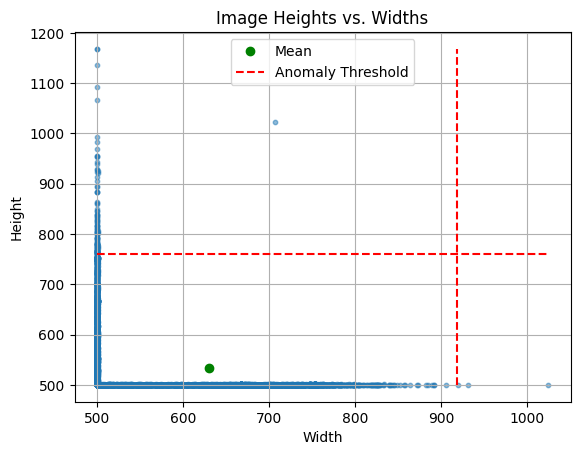

In [22]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Path to the folder containing the images
folder_path 

# Initialize empty lists to store image heights and widths
heights = []
widths = []

# Iterate over the images in the folder using os.walk
for root, _, files in os.walk(folder_path):
    for image_file in files:
        image_path = os.path.join(root, image_file)

        # Load the image
        image = Image.open(image_path)

        # Get the height and width of the image
        width, height = image.size

        # Append the height and width to the respective lists
        heights.append(height)
        widths.append(width)

# Calculate the mean and standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

# Set the threshold for anomaly detection (e.g., 3 standard deviations from the mean)
threshold_height = mean_height + 3 * std_height
threshold_width = mean_width + 3 * std_width

# Create a list to store the indices of anomalies
anomaly_indices = []

# Iterate over the heights and widths to identify anomalies
for i in range(len(heights)):
    if heights[i] > threshold_height or widths[i] > threshold_width:
        anomaly_indices.append(i)

# Print the list of anomalies
print("Anomalies:")
for i in anomaly_indices:
    print(f"Image {i+1} - Height: {heights[i]}, Width: {widths[i]}")

# Create the scatter plot
plt.scatter(widths, heights, s=10, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Heights vs. Widths')
plt.grid(True)

# Add points and dotted lines for min, max, and mean values
plt.plot([mean_width], [mean_height], 'go', label='Mean')
plt.plot([threshold_width, threshold_width], [np.min(heights), np.max(heights)], 'r--', label='Anomaly Threshold')
plt.plot([np.min(widths), np.max(widths)], [threshold_height, threshold_height], 'r--')
plt.legend()

plt.show()



Most of the images are of size 500xwidth or heightx500 and one image that is around 1022x707 
<br> Anomalies are points that have heights or widths beyond 3 standard-deviations from the mean

In [88]:
import pandas as pd

# Specify the path to your text file
text_file_path = r'C:\Users\cgwel\2526\flowers102datasetlabels.txt'

# Read the text file into a DataFrame
names_df = pd.read_csv(text_file_path, delimiter='\r', header = None)


# Display the DataFrame
names_df.to_csv('names_df.csv', index = False)


In [112]:
names_df

,0
0,'pink primrose'
1,'hard-leaved pocket orchid'
2,'canterbury bells'
3,'sweet pea'
4,'english marigold'
...,...
97,'mexican petunia'
98,'bromelia'
99,'blanket flower'
100,'trumpet creeper'


In [111]:
df.iloc[1][0]

" 'hard-leaved pocket orchid'"

Extract the 17flower dataset to use for testing later

In [37]:
import tarfile
mytar = tarfile.open(r'C:\Users\cgwel\2526\17flowers.tgz')
mytar.extractall('C:\\Users\\cgwel\\2526\\17flowers')
mytar.close()



<font size = '+2'> Train model 

Training a model on new images off of a pre-trained Resnet50 model. I used the following link as reference https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [23]:

import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import time
import numpy as np
from PIL import Image
import json
from collections import OrderedDict
import os

Load datasets dataloders and transforms <br> ML requires images to be of size 224 px

In [144]:


#transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                         transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(p = 0.6),
                                         transforms.RandomVerticalFlip(p = 0.4),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

train_dir = r'C:\Users\cgwel\2526\flowers\train'
val_dir = r'C:\Users\cgwel\2526\flowers\val'
test_dir = r'C:\Users\cgwel\2526\test'

#Load datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(val_dir, transform=test_transforms)
val_data = datasets.ImageFolder(val_dir, transform=valid_transforms)

#Load Dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=64)

class_names = train_data.classes



Build new model by building off of last connected laters 

In [25]:
#Build and train your network
num_classes = len(class_names)
weights= models.ResNet50_Weights.IMAGENET1K_V2
# setup to pick up GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# get pre-trained model
model = models.resnet50(weights = weights)
#print(model)

# freeze parameters - to prevent gradients and backprop
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(nn.Linear(2048, 500),
                           nn.ReLU(),
                           nn.Dropout(p=0.2),
                           nn.Linear(500, num_classes),
                           nn.LogSoftmax(dim=1)
                          )
 

# Initialization
criterion = nn.NLLLoss()

optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

# move model to cuda if available
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Train model 

In [26]:
traintime = time.time()

epochs = 30
training_loss = 0
best_train_accuracy = 0
best_valid_accuracy = 0

train_losses, valid_losses = [], []

for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        
        # move the variables to GPU
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()        
        
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        
        training_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0

        # turn off dropouts
        model.eval()

        with torch.no_grad():                

            for images, labels in valid_loader:

                # move the variables to GPU
                images, labels = images.to(device), labels.to(device)
                
                start = time.time()

                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_prob, top_class = ps.topk(1, dim=1)
                targets = labels.view(*top_class.shape)
                isEqual = top_class == targets                                                  
                accuracy += torch.mean(isEqual.type(torch.FloatTensor))
            
            train_loss = training_loss / len(train_loader)
            valid_loss = test_loss / len(valid_loader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            
            train_accuracy = accuracy / len(valid_loader)
            valid_accuracy = accuracy / len(valid_loader)
            
            if train_accuracy > best_train_accuracy:
                best_train_accuracy = train_accuracy
            
            if valid_accuracy > best_valid_accuracy:
                best_valid_accuracy = valid_accuracy
            
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {train_loss:.3f}.. "
                  f"Validation loss: {valid_loss:.3f}.. "
                  f"Validation accuracy: {valid_accuracy:.3f}")
            print(f"Device = {device}; Time per batch: {(time.time() - start)/len(valid_loader):.3f} seconds")
            
            training_loss = 0
            
            # Switch back to training
            model.train()
            
print(f"Best Training Accuracy: {best_train_accuracy:.3f}")
print(f"Best Validation Accuracy: {best_valid_accuracy:.3f}")
print(f"\nTotal Time: {(time.time() - traintime)/60:.3f} minutes")


Epoch 1/30.. Train loss: 2.270.. Validation loss: 0.750.. Validation accuracy: 0.800
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 2/30.. Train loss: 0.866.. Validation loss: 0.423.. Validation accuracy: 0.885
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 3/30.. Train loss: 0.660.. Validation loss: 0.343.. Validation accuracy: 0.904
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 4/30.. Train loss: 0.604.. Validation loss: 0.301.. Validation accuracy: 0.915
Device = cuda:0; Time per batch: 0.011 seconds
Epoch 5/30.. Train loss: 0.536.. Validation loss: 0.259.. Validation accuracy: 0.937
Device = cuda:0; Time per batch: 0.012 seconds
Epoch 6/30.. Train loss: 0.482.. Validation loss: 0.301.. Validation accuracy: 0.909
Device = cuda:0; Time per batch: 0.059 seconds
Epoch 7/30.. Train loss: 0.495.. Validation loss: 0.279.. Validation accuracy: 0.925
Device = cuda:0; Time per batch: 0.014 seconds
Epoch 8/30.. Train loss: 0.448.. Validation loss: 0.244.. Validation accurac

In [27]:
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 102,
              'hidden_layer' : 500,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': train_data.class_to_idx,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'trained_model_chpt.pth')

model.to("cpu")
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 102,
              'hidden_layer' : 500,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': train_data.class_to_idx,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'trained_model_cpu_chpt.pth')
model.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

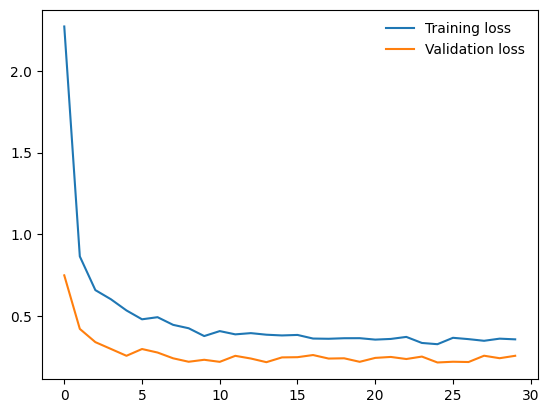

In [28]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)

As we can see from the plot as epochs increased training and validation accuracy decrease indicating the model is learning and improving performance <br> Training loss and validation loss both decrease as epochs increase with training initially falling more drastically in the beginning <br> The small gap between the curves indicates that the model is generalizing well to the unseen data and not overfitting. <br> 

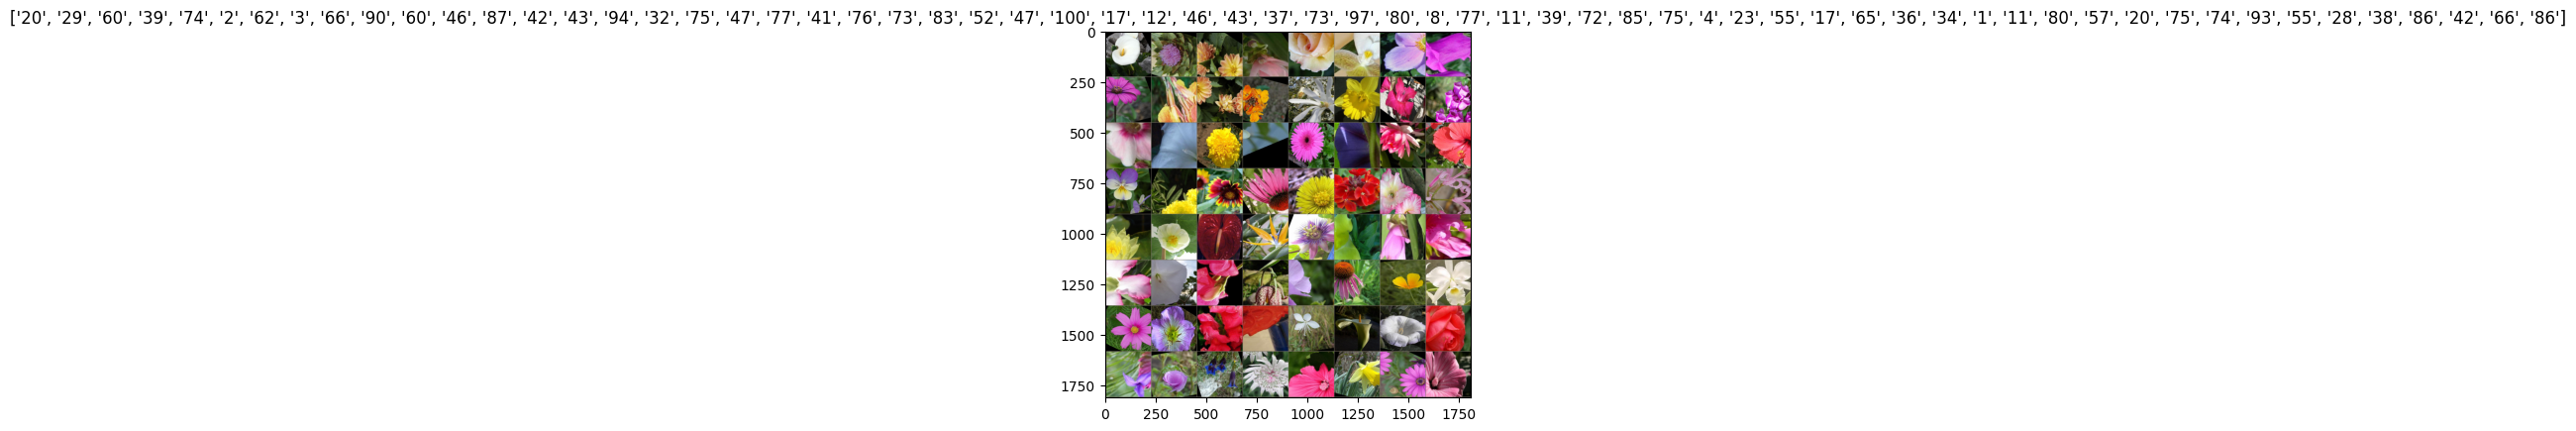

In [29]:
class_names = train_data.classes
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [137]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(15, 10))

    with torch.no_grad():
        for images, labels in valid_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            probabilities = torch.softmax(outputs, dim=1)

            for j in range(images.size()[0]):
                images_so_far += 1

                # Create a grid of subplots with 1 row and 2 columns
                ax1 = plt.subplot(num_images, 2, 2 * images_so_far - 1)
                ax1.axis('off')
                ax2 = plt.subplot(num_images, 2, 2 * images_so_far)
                ax2.axis('off')

                # Display the image in the left subplot
                ax1.imshow(images.cpu().data[j].permute(1, 2, 0))
                predicted_class = class_names[preds[j]]
                actual_class = class_names[labels[j]]
                probability = probabilities[j, preds[j]].item()
                
                # Display the predicted class, actual class, and probability in the right subplot
                ax2.text(0, 0.5, f'Predicted: {predicted_class}\nActual: {actual_class}\nProbability: {probability:.3f}', 
                         verticalalignment='center', fontsize=12)
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


Lets see what the model is doing. Upload 6 images from class 1 and find their probabilities. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


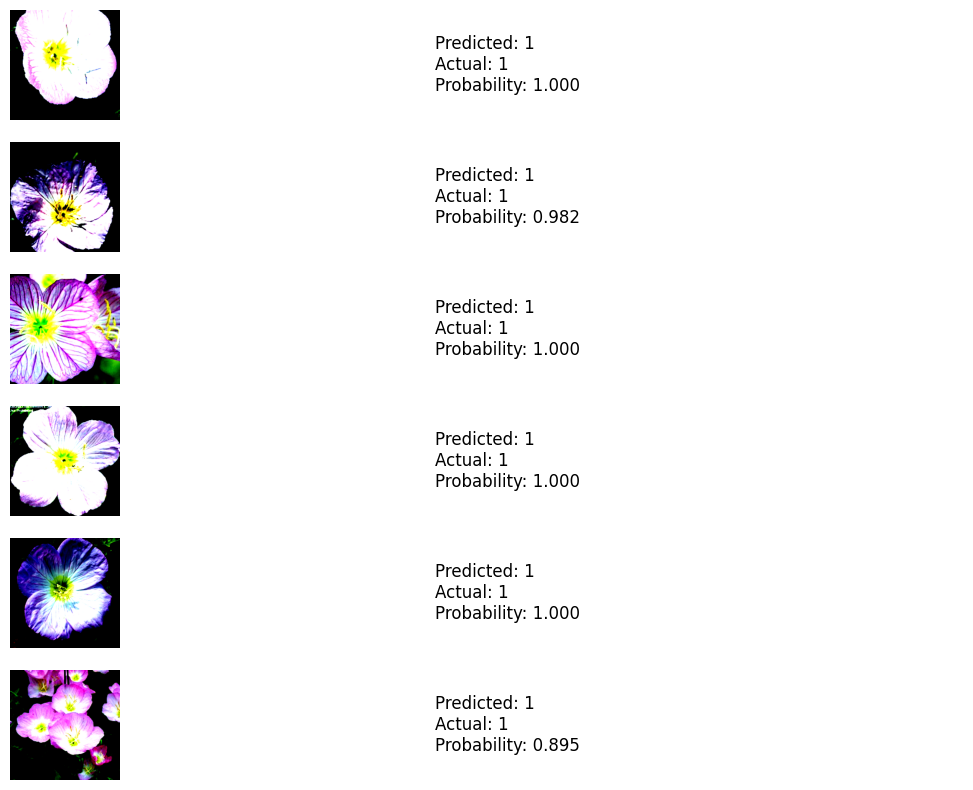

In [138]:
visualize_model(model)

In [32]:
#function that loads a checkpoint and rebuilds the model
def load_Checkpoint(filename):
    
    if torch.cuda.is_available():
        checkpoint = torch.load(filename)
    else:
        checkpoint = torch.load(filename,map_location='cpu')
        
    # get pre-trained model
    model1 = models.resnet50(weights = weights)
    
    # freeze parameters - to prevent gradients and backprop
    for param in model1.parameters():
        param.requires_grad = False

    # TODO - this function should load for any architecture
    
    classifier = nn.Sequential(nn.Linear(2048, 500),
                               nn.ReLU(),
                               nn.Dropout(p=0.2),
                               nn.Linear(500, num_classes),
                               nn.LogSoftmax(dim=1)
                              )
    model1.fc = classifier   
    
    
    model1.load_state_dict(checkpoint['model_state_dict'])
    
    model1.class_to_idx = checkpoint['class_to_idx']
    
    return model1

In [119]:

weights = models.ResNet50_Weights.IMAGENET1K_V2
num_classes = 102
# test saving and loading
criterion = nn.NLLLoss()
new_model = load_Checkpoint('trained_model_chpt.pth')



In [120]:
# TODO: Do validation on the test set
def test_network(model1, test_loader, device):
    start = time.time()
    test_loss = 0
    accuracy = 0

    # turn of dropouts
    model1.eval()

    with torch.no_grad():                

        for images, labels in test_loader:

            # move the variables to GPU
            images, labels = images.to(device), labels.to(device) 

            logps = model1(images)
            loss = criterion(logps, labels)
            test_loss += loss.item()

            # Calculate accuracy
            ps = torch.exp(logps)
            top_prob, top_class = ps.topk(1, dim=1)
            targets = labels.view(*top_class.shape)
            isEqual = top_class == targets                                                  
            accuracy += torch.mean(isEqual.type(torch.FloatTensor))

        print(f"Test loss: {test_loss/len(test_loader):.3f}.. "
              f"Test accuracy: {accuracy/len(test_loader):.3f}")
        print(f" Time per batch: {(time.time() - start):.3f} seconds")
        test_loss = 0

        # switch back to training
        model1.train()

In [123]:


# adiitional test - check if loaded checkpoint performs as expected
# setup to pick up GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
new_model.to(device)
test_network(new_model, test_loader, device)



Test loss: 0.259.. Test accuracy: 0.944
 Time per batch: 24.953 seconds


Test the model against images it hasnt seen yet. Using images from the 17flowers dataset

In [139]:
def process_image(image):
   
    #Process a PIL image for use in a PyTorch model
    
    crop_size = 224
    new_width = 256
    # ImageNet mean and std    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # 1. Resize with shortest side 256 and maintain aspect ratio
    width, height = image.size
    orig_ar = width / height
    if width < height:
        new_width = 256
        new_height = new_width / orig_ar
    elif width > height:
        new_height = 256
        new_width = new_height * orig_ar
    else:
        new_width = new_height = 256
    image.thumbnail((new_width, new_height), Image.Resampling.LANCZOS)

    # 2. center crop
    left = int((new_width - crop_size) / 2)
    top = int((new_height - crop_size) / 2)
    right = int((new_width + crop_size) / 2)
    bottom = int((new_height + crop_size) / 2)
    image = image.crop((left, top, right, bottom))
    
    # 3. PIL to nparray - 0-255
    np_image = np.array(image)
    # scale : 0 to 1 range
    np_image = np_image / 255.0
    
    # 4. Normalize the image
    np_image = (np_image - mean) / std

    # 5. re-order color channels
    out_image = np.transpose(np_image, (2, 0, 1))
    
    return out_image

In [125]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

In [126]:
def predict(image_path, new_model, device, topk=10):
   #predict 
    
    # TODO: Implement the code to predict the class from an image file
    image = Image.open(image_path)

    image_ndarray = process_image(image)
    
    # turn off dropouts
    new_model.eval()
    
    new_model.to(device)

    # create a torch tensor of type float32
    image_torch = torch.from_numpy(image_ndarray).type(torch.cuda.FloatTensor)

    # reshape to incorporate batch size
    batch_t = torch.unsqueeze(image_torch, 0)
    
    logps = new_model(batch_t)
    ps = torch.exp(logps)
    top_prob, top_idx = ps.topk(topk,dim=1)
        
    # index to class mapping
    idx_to_class = {value : key for key, value in new_model.class_to_idx.items()}
    
    # convert torch to numpy
    top_idx = top_idx.tolist()[0]
    top_class = [ idx_to_class[entry] for entry in top_idx]
    
    return top_prob.tolist()[0], top_class



In [133]:
def view_classify(img, top_class, topk):

    #class_names = [ cat_to_name[item] for item in top_class]
    #print(class_names)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)    
    ax1 = imshow(image_torch, ax = ax1)
    ax1.axis('off')
    
    
    y_pos = np.arange(topk)
    ax2.barh(np.arange(topk), list(reversed(top_prob)))
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(topk))
    ax2.set_yticklabels(reversed(top_class), size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    

[0.9998999238014221, 8.707874803803861e-05, 4.029130650451407e-06, 3.1942975056153955e-06, 2.4183859750337433e-06, 1.8426486576572643e-06, 1.0486855899216607e-06, 1.648495242534409e-07, 1.1759006213196699e-07, 3.465307685246444e-08]
['6', '18', '94', '21', '84', '72', '90', '79', '102', '40']


prediction : results 
Class number :  6
Probability :  0.9998999238014221 



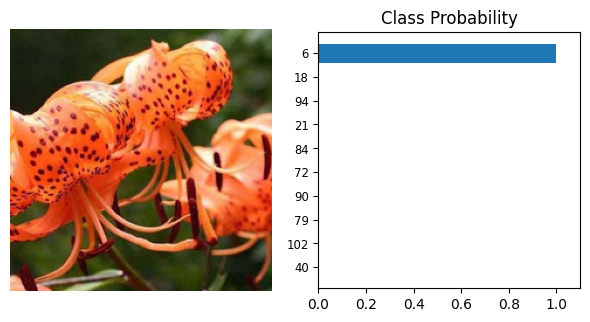

In [141]:
# test prediction
with torch.no_grad():   
    
    image_path = r'C:\Users\cgwel\2526\test\6\image_0482.jpg' #class 6
    
        
    topk = 10

    top_prob, top_class = predict(image_path, new_model, device, topk=10)

    image = Image.open(image_path)
    image_ndarray = process_image(image)
    image_torch = torch.from_numpy(image_ndarray)
    #imshow(image_torch)

    print(top_prob)
    print(top_class)
    
    view_classify(image_torch, top_class, topk)
    
    print("\n\nprediction : results ")

    #class_names = [cat_to_name[item] for item in top_class]

    #print("Class name : ", class_names[0])
    print("Class number : ", top_class[0])
    print("Probability : ", top_prob[0], "\n")

<Font size = "+2"> Model Accuracy, precision, recall, and f1 scores</font>
<br>F1 score: measures models accuracy by combining precision an recall. 
<br>Precision: models ability to correctly identify correctly 
<br>Recall: sensitivity of model to correctly identify 
<br>Accuracy: overall performance. Ratio of (correct predictions)/(total predictions)

<br>For each class and average sum

In [149]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set your model in evaluation mode
model.eval()

zero_division_value = 0.0
# Create empty lists to store the metrics
#class_names = ['1', 'class2', 'class3']  # Replace with your actual class names
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over the test dataset
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    
    # Forward pass
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Calculate metrics for each class
    for class_idx in range(len(class_names)):
        class_labels = (labels == class_idx)
        class_predicted = (predicted == class_idx)
        
        # Accuracy
        accuracy = accuracy_score(class_labels.cpu(), class_predicted.cpu())
        accuracies.append(accuracy)
        
        # Precision
        precision = precision_score(class_labels.cpu(), class_predicted.cpu())
        precisions.append(precision)
        
        # Recall
        recall = recall_score(class_labels.cpu(), class_predicted.cpu())
        recalls.append(recall)
        
        # F1-score
        f1 = f1_score(class_labels.cpu(), class_predicted.cpu())
        f1_scores.append(f1)

# Calculate the average metrics across all classes
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1_score = sum(f1_scores) / len(f1_scores)

# Print the metrics for each class
for class_name, accuracy, precision, recall, f1_score in zip(class_names, accuracies, precisions, recalls, f1_scores):
    print(f'Class: {class_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1_score:.4f}')
    print()

# Print the average metrics
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1-score: {avg_f1_score:.4f}')


c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Class: 1
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Class: 10
Accuracy: 0.9688
Precision: 1.0000
Recall: 0.8462
F1-score: 0.9167

Class: 100
Accuracy: 0.9844
Precision: 1.0000
Recall: 0.8889
F1-score: 0.9412

Class: 101
Accuracy: 0.9062
Precision: 1.0000
Recall: 0.7143
F1-score: 0.8333

Class: 102
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Class: 11
Accuracy: 0.9844
Precision: 1.0000
Recall: 0.9000
F1-score: 0.9474

Class: 12
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 13
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 14
Accuracy: 0.9688
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 15
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 16
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 17
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Class: 18
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1

c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\cgwel\2526\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

Given an image the model has not seen before the model predicts this image belongs to class 6 with a probability of 99%. The actual class is 6. 

<font size = '+2'> Methods to improve model performance

<font size = '+2'> I. Image feature engineering </font>
1. Cropping
2. Grayscale image: Lessen data by using grayscale to capture intensity of regions of flower
3. RGB channels: use a specfic channel parameter that is helpful in distiguishing the flower from the rest of the image
4. Intensity threshold: applying a intensity threshold and isolate the flower from the rest of the image
5. Edge detection: find the edges fo the flower and isolate it from the rest of the image

<font size = '+2'> II. Data augmentation</font>
1. random flips
2. crop
3. random rotation

Augment already existing data to artificially increase the training data and reduce overfitting 




<font size = '+2'> III. ConvNet as a fixed extractor </font>
1. Use svm, LR or others on extracted features to train a linear classifier on the dataset
Use pre-trained ConvNets as fixed feature extracor for transfer learning

<font size = '+2'> IV. Architecture </font>
1. ResNet152: a very deep neural network that will be more sensitive to training
2. SAM
3. ImageNet-21k

Training using a different architecture could improve model performance as some of these architectures are very deep neural networks

<font size = '+2'> V. More Data </font> <br>
Using more data will increase the models accuracy 

<font size = '+2'> Highest level of accuracy achived on this dataset </font>
<br> https://paperswithcode.com/sota/image-classification-on-flowers-102
1. 99.76 model cct-14/7x2 
2. 99.75 model VIT-L/16
3. 99.72 model CvT-W24 

Some models have achived a tremendous amount of accuracy on the flowers102 dataset, 1 and 3 used extra training data and Transformers and 2 used a technique known as Multitask learning 